In [230]:
import io
import csv
import dateutil.parser as parser
from collections import defaultdict
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import scipy
from scipy.stats import linregress

# use seaborn plotting defaults
import seaborn as sns; sns.set()
from fig_code import visualize_tree, plot_tree_interactive

def plotXY(X, y):
    proper = {}
    for i in range(0, len(X)):
        k = float(X[i][0])
        v = y[i]
        proper[k] = v

    from collections import OrderedDict
    od = OrderedDict(sorted(proper.items(), key=lambda t: t[0]))
    plt.plot(od.keys(), od.values())

# read data and filter for one vm (one user)
f = io.open('VMStats.csv')
myCsvReader = csv.DictReader(f)

def model(user = "Pool-NOAVFC170", ylabel = 'VM Memory Usage(MB)', limit = 1000, skipCount = 0):    
    i = 1
    myset = {}
    X_mem = {}
    for row in myCsvReader:
        if skipCount > 0:
            skipCount -= 1
            continue
        if i >= limit:
            break
        i = i + 1    
        if row['VM Name'] == user:
            X_mem [float(parser.parse(row['Date']).timestamp())] = float(row[ylabel])

    X = []
    y = []

    for k in X_mem:
        X.append([k])
        y.append(X_mem[k])

    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)
    ypred = RandomForestRegressor(100).fit(Xtrain, ytrain).predict(Xtest)

    m, b, r_value, p_value, std_err = stats.linregress(ytest, ypred.tolist())

    print(std_err)

    plt.errorbar(X_mem.keys(), X_mem.values(), 0.3, fmt='o')
    plotXY(Xtest, ytest)
    plotXY(Xtest, ypred)

0.0213394010167


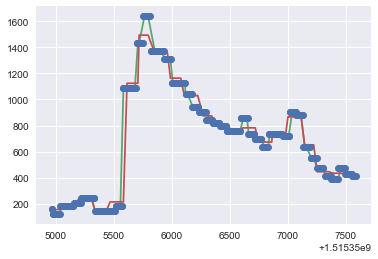

In [235]:
model(limit=100000, skipCount=80000)

In [ ]:
model(user = "Pool-NOAVFC171", ylabel = 'VM Memory Usage(MB)', skipCount=100)

nan


C:\Users\mauryap\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:106: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\mauryap\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:118: RuntimeWarning: invalid value encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


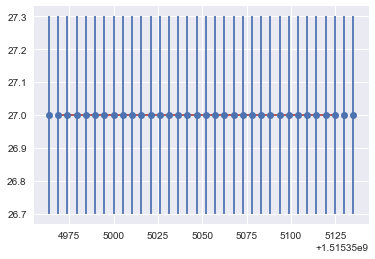

In [225]:
model(user = "Pool-NOAVFC171", ylabel = 'Cpu Utilization(Mhz)')